## 深入理解 Python 中的元類（Metaclass）
在 Python 中，元類（Metaclass）是一個強大且少為人知的工具，它能讓你在類創建時操控類的行為。你可以把它想像成「創建類的類」。本筆記將帶你深入了解元類的概念、使用方法，以及它在實際編程中的應用。

什麼是元類？
簡單來說，元類就是用來創建類的類。當你創建一個類時，Python 會使用元類來創建這個類的實例。默認情況下，Python 使用 type 作為所有類的元類，但你也可以定義自己的元類來改變類的創建行為。

object() <- type() <- class() <- instance

### 為什麼要使用元類？

使用元類的主要原因是你需要在類創建時自動進行一些操作，例如：

- 自動添加屬性或方法
- 修改現有的屬性或方法
- 強制類符合某些約束
- 這些操作對於某些高級應用場景非常有用，例如框架開發、ORM（Object-Relational Mapping）等。

---


補充教材：
[淺談 Python Metaclass](https://dboyliao.medium.com/%E6%B7%BA%E8%AB%87-python-metaclass-dfacf24d6dd5)


## 先備知識: type() 函數

在深入了解元類之前，我們需要先理解 type() 函數的基本用法。type() 是 Python 中的一個內建函數，有三種主要用途：



### 1. 獲取對象的類型(型別)

In [55]:
print(type(123))  # Output: <class 'int'>
print(type('hello'))  # Output: <class 'str'>
print(type([]))  # Output: <class 'list'>


<class 'int'>
<class 'str'>
<class 'list'>


### 2. 動態創建類
type() 還可以用來動態創建類。它的語法是：type(class_name, bases, dict)，其中：

class_name 是類的名稱（字符串）。
bases 是一個元組，包含類的基類。
dict 是一個字典，包含類的屬性和方法。

In [56]:
MyClass = type('MyClass', (object,), {'x': 5, 'print_x': lambda self: print(self.x)})

'''
### 原始寫法

class MyClass_normal_type:
    def __init__(self):
        self.x = 5

    def print_x(self):
        print(self.x)

'''

obj = MyClass()
obj.print_x()  # Output: 5



5


In [57]:
print(type(obj))  # Output: <class 'type'>

<class '__main__.MyClass'>


### 3. 作為元類


當我們定義一個新的類時，Python 其實是在調用 type() 函數來創建這個類。

原則上 class 都會繼承 type 類，且默認情況下，所有類都是 type 類的實例。


> **白話文: 我們常會討論 cat 是 animal 這個類的實例，但 animal 這個類是誰的實例呢? 答案是 type 這個類** <br>
> **所謂的元指的是祖先的意思，你可以把他想成所有我們創建的類都會繼承至同一個類，這樣就可以在創建之初擁有共同的特定方法或是屬性**

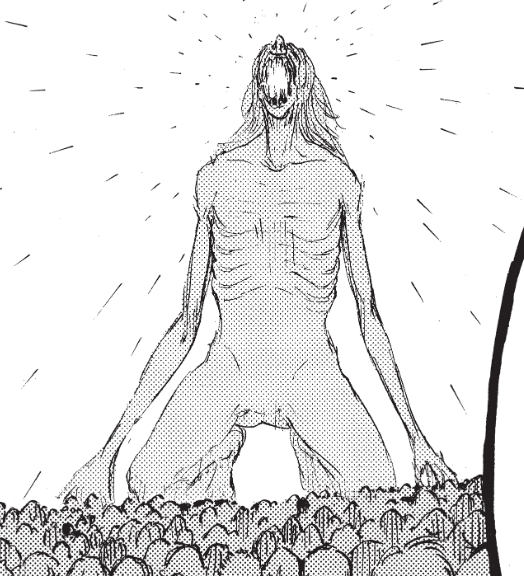

In [58]:
class MyClass:
    pass

print(type(MyClass))  # Output: <class 'type'>


<class 'type'>


### 補充: Python 中的類層次結構

在 Python 中，所有東西都是對象，包括類和 metaclass。為了更好地理解這個概念

幾個關鍵概念：object、type、class 和 instance。必須說明清楚

- 所有的實例(instance)都是由類創建的。
- 所有的類(class)都是由 metaclass 創建的。
- 默認情況下，所有的類和 metaclass 都是 type 的實例。
- type 本身也是一個類別，它是所有類和 metaclass 的 metaclass。
- object 是所有類的基類。


**結論: object 才是一切的根源**

object <- type <- class <- instance


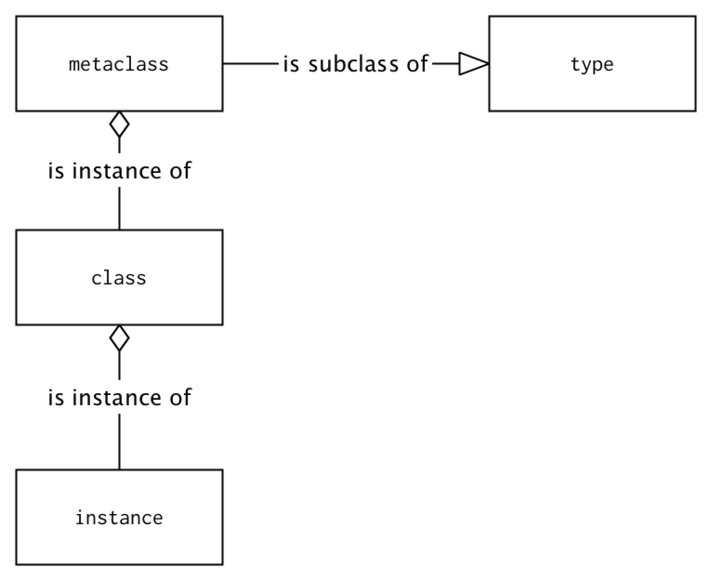

In [59]:
# 檢查 MyClass 是否是 type 的實例
class MyClass:
    pass

print(isinstance(MyClass, type))  # Output: True

# 檢查 MyClass 的實例是否是 MyClass 的實例
obj = MyClass()
print(isinstance(obj, MyClass))  # Output: True

# 檢查 object 是否是 type 的實例
print(isinstance(object, type))  # Output: True

# 檢查 MyClass 是否是 type 的實例
print(isinstance(MyClass, type))  # Output: True

# 檢查 MyClass 是否是 object 的子類
print(issubclass(MyClass, object))  # Output: True

# 檢查 type 是否是 object 的子類
print(issubclass(type, object))  # Output: True


True
True
True
True
True
True


## 正題: 甚麼是元類? metaclass

「創建類的類」

### 以下實際應用

## 自動添加屬性

假設你正在設計一個系統來管理家庭中的各種電器。你希望所有的電器類別都自動記錄購買日期。你可以使用元類來自動為每個電器類別添加一個 purchase_date 屬性。

In [60]:
# metaclass
class ApplianceMeta(type):
    def __new__(cls, name, bases, dct):
        dct['purchase_date'] = 'Unknown'
        return super().__new__(cls, name, bases, dct)
    


In [70]:
class Appliance(metaclass=ApplianceMeta): # class 
    pass

class WashingMachine(Appliance): 
    pass

class Refrigerator(Appliance):
    pass


print(WashingMachine.purchase_date)  # Output: Unknown
print(Refrigerator.purchase_date)    # Output: Unknown


Unknown
Unknown


In [79]:
type(WashingMachine)

__main__.ApplianceMeta

## 強制實現某些方法

假設你正在設計一個動物園管理系統，要求所有動物類別都必須實現一個 make_sound 方法來模擬動物的叫聲。你可以使用元類來強制這一要求。

In [63]:
class AnimalMeta(type):
    def __new__(cls, name, bases, dct):
        if 'make_sound' not in dct:
            raise TypeError(f"Class {name} must implement 'make_sound' method")
        return super().__new__(cls, name, bases, dct)


In [66]:
class Animal(metaclass=AnimalMeta):
    pass

class Dog(Animal):
    def make_sound(self):
        return "Woof!"

class Cat(Animal):
    def make_sound(self):
        return "Meow!"


TypeError: Class Animal must implement 'make_sound' method

In [67]:
class Animal(metaclass=AnimalMeta):
    def make_sound(self):
        pass

class Dog(Animal):
    def make_sound(self):
        return "Woof!"

class Cat(Animal):
    def make_sound(self):
        return "Meow!"


dog = Dog()
cat = Cat()
print(dog.make_sound())  # Output: Woof!
print(cat.make_sound())  # Output: Meow!


Woof!
Meow!
